# <div style="color:#1968b3;display:fill;border-radius:10px;background-color:white"><p style="color:#1968b3;padding:12px;text-align:center; font-size:150%"><b>FauxFinder: CNN & Pre-trained Model</b></p></div>

## 🎨 **Classifying Real and Fake Art Images Using CNNs and Transfer Learning**

The **FauxFinder** project utilizes **Convolutional Neural Networks (CNNs)** and **Pre-trained deep learning model**, to classify art images into "Real" (human-made) and "Fake" (AI-generated) categories. This project focuses on leveraging both custom and transfer learning approaches to build a robust binary image classification system.

---

### **Key Features of FauxFinder CNN & Pre-trained**:
- **Dataset**: Built from a collection of <a href="https://www.kaggle.com/datasets/doctorstrange420/real-and-fake-ai-generated-art-images-dataset" style="color:#1968b3;text-decoration:underline;"><b>real and AI-generated art images</b></a>, evenly split into **10,821 real** and **10,821 fake** examples.
- **Preprocessing**:
  - Resizing images to **256x256 pixels** for consistency.
  - Data augmentation applied to improve model generalization.
- **Custom CNN**:
  - Designed for binary classification using convolutional layers.
- **Transfer Learning**:
  - Experimented with multiple pre-trained model like - 
- **Applications**:
  - Detecting AI-generated content.
  - Enhancing dataset diversity for other classification tasks.
    
<p>
      ➡️ Learn more about the project by visiting the 
      <a href="https://github.com/Kaleemullah-Younas/FauxFinder-Real-vs-Fake-Art-Detection" style="color:#1968b3;text-decoration:underline;"><b>GitHub Repository</b></a>.</p>

---

<a id="section-one"></a>
# <div style="color:#1968b3;display:fill;border-radius:10px;background-color:white"><p style="padding:12px;color:#1968b3"><b>1 | Roadmap</b></div>

- [x] Setting up the environment and importing libraries.
- [x] Splitting the dataset into training and testing sets.
- [x] Preprocessing images and applying data augmentation.
- [x] Designing a custom CNN architecture.
- [x] Experimentation with Pre-trained model for binary classification.
- [x] Training and evaluating models.
- [x] Visualizing results with a confusion matrix and classification report.

Almost same Steps are done for Pre-trained Model also.

<a id="section-three"></a>
# <div style="color:#1968b3;display:fill;border-radius:10px;background-color:white"><p style="padding:12px;color:#1968b3"><b>2 | CNN Model Implementation</b></div>

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy
import numpy as np
import random
import os
import pandas as pd
import cv2
import shutil
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Suppress warnings by setting logging level to ERROR
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # '0' = all logs, '1' = filter INFO, '2' = filter WARNING, '3' = filter ERROR
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress all logs except errors
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="keras.src.trainers.data_adapters.py_dataset_adapter")

In [4]:
# Paths to your folders
fake_folder = '/kaggle/input/real-and-fake-ai-generated-art-images-dataset/Data/REAL'
real_folder = '/kaggle/input/real-and-fake-ai-generated-art-images-dataset/Data/REAL'

# Create necessary directories if they don't exist
os.makedirs('/kaggle/working/training_set/real', exist_ok=True)
os.makedirs('/kaggle/working/training_set/fake', exist_ok=True)
os.makedirs('/kaggle/working/test_set/real', exist_ok=True)
os.makedirs('/kaggle/working/test_set/fake', exist_ok=True)

# Function to move files into the correct directory
def move_files(file_list, source_folder, dest_folder):
    for file_name in file_list:
        shutil.copy(os.path.join(source_folder, file_name), dest_folder)

# Get all the filenames from the FAKE and REAL directories
real_images = os.listdir(real_folder)
fake_images = os.listdir(fake_folder)

# Split the data into 80% training and 20% testing
train_real, test_real = train_test_split(real_images, test_size=0.2, random_state=42)
train_fake, test_fake = train_test_split(fake_images, test_size=0.2, random_state=42)

# Move the images into the appropriate folders
move_files(train_real, real_folder, '/kaggle/working/training_set/real')
move_files(test_real, real_folder, '/kaggle/working/test_set/real')

move_files(train_fake, fake_folder, '/kaggle/working/training_set/fake')
move_files(test_fake, fake_folder, '/kaggle/working/test_set/fake')

print("Dataset split and folders created successfully!")

Dataset split and folders created successfully!


In [5]:
# Define data paths
train_real_folder = '/kaggle/working/training_set/real/'
train_fake_folder = '/kaggle/working/training_set/fake/'
test_real_folder = '/kaggle/working/test_set/real/'
test_fake_folder = '/kaggle/working/test_set/fake/'

In [6]:
# Function to list image files in a given folder
def list_images_in_folder(folder_path):
    # List all files in the folder and filter out non-image files (optional)
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
    return image_files

# List images in the directories
train_real_images = list_images_in_folder(train_real_folder)
train_fake_images = list_images_in_folder(train_fake_folder)
test_real_images = list_images_in_folder(test_real_folder)
test_fake_images = list_images_in_folder(test_fake_folder)

# Print the number of images in each folder
print(f'Training Real Images: {len(train_real_images)}')
print(f'Training Fake Images: {len(train_fake_images)}')
print(f'Test Real Images: {len(test_real_images)}')
print(f'Test Fake Images: {len(test_fake_images)}')

Training Real Images: 8656
Training Fake Images: 8656
Test Real Images: 2165
Test Fake Images: 2165


<a id="subsection-one"></a>
## <b><span style='color:#1968b3'>2.1</span> | labelling the data</b>

In [7]:
# Load train image paths and labels
train_image_paths = []
train_labels = []

# Load train_real image paths and labels
for filename in os.listdir(train_real_folder):
    image_path = os.path.join(train_real_folder, filename)
    label = 0  # Real images have label 0
    train_image_paths.append(image_path)
    train_labels.append(label)

# Load train_fake image paths and labels
for filename in os.listdir(train_fake_folder):
    image_path = os.path.join(train_fake_folder, filename)
    label = 1  # Fake images have label 1
    train_image_paths.append(image_path)
    train_labels.append(label)

# Load test image paths and labels
test_image_paths = []
test_labels = []

# Load test_real image paths and labels
for filename in os.listdir(test_real_folder):
    image_path = os.path.join(test_real_folder, filename)
    label = 0  # Assuming test real images are all real (label 0)
    test_image_paths.append(image_path)
    test_labels.append(label)

# Load test_fake image paths and labels
for filename in os.listdir(test_fake_folder):
    image_path = os.path.join(test_fake_folder, filename)
    label = 1  # Assuming test fake images are all fake (label 1)
    test_image_paths.append(image_path)
    test_labels.append(label)

# Create DataFrames
train_dataset = pd.DataFrame({'image_path': train_image_paths, 'label': train_labels})
test_dataset = pd.DataFrame({'image_path': test_image_paths, 'label': test_labels})

train_dataset.head()

,image_path,label
0,/kaggle/working/training_set/real/0106368891b7...,0
1,/kaggle/working/training_set/real/cb3e5d64ec45...,0
2,/kaggle/working/training_set/real/48e08e6bd1e0...,0
3,/kaggle/working/training_set/real/17b4ad9d0693...,0
4,/kaggle/working/training_set/real/3ff6d3c96d87...,0


<a id="subsection-two"></a>
## <b><span style='color:#1968b3'>2.2</span> | Getting ready data for model</b>

In [10]:
# Define the data generators
train_datagen = ImageDataGenerator(rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
# Load the train and test data
train_generator = train_datagen.flow_from_directory(
    "/kaggle/working/training_set",
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    "/kaggle/working/test_set",
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary')

#train_generator = train_generator.repeat()

Found 17312 images belonging to 2 classes.
Found 4330 images belonging to 2 classes.


In [13]:
steps_per_epoch = len(train_generator)  # Number of batches in your dataset
print(f"Number of samples in dataset: {len(train_generator)}")

Number of samples in dataset: 541


<a id="subsection-three"></a>
## <b><span style='color:#1968b3'>2.3</span> | Designing a custom CNN architecture.</b>

In [14]:
# Creating CNN Model Architecture
model = Sequential()
model.add(Input(shape=(256,256,3)))
# First Conv Layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
# Second Conv Layer
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
# Third Conv Layer
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
# Fourth Conv Layer (more filters for more feature extraction)
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
# Flattening Layer
model.add(Flatten())
# Dense Layer
model.add(Dense(1024, activation='relu'))
# Dropout Layer to avoid overfitting
model.add(Dropout(0.5))
# Output Layer (Sigmoid for binary classification)
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │     134,218,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 135,770,753 (517.92 MB)

 Trainable params: 135,770,753 (517.92 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<a id="subsection-four"></a>
## <b><span style='color:#1968b3'>2.4</span> | Training the CNN Model</b>

In [ ]:
# Train the model for 20 epoch
model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=20)

Epoch 1/20

**541/541** <span style="color:green;">━━━━━━━━━━━━━━━━━━━━</span> **245s** 409ms/step - accuracy: 0.6626 - loss: 0.7229

Epoch 2/20

**541/541** <span style="color:green;">━━━━━━━━━━━━━━━━━━━━</span> **230s** 402ms/step - accuracy: 0.7612 - loss: 0.5121

Epoch 3/20

**541/541** <span style="color:green;">━━━━━━━━━━━━━━━━━━━━</span> **227s** 413ms/step - accuracy: 0.8555 - loss: 0.3412

Epoch 4/20

**541/541** <span style="color:green;">━━━━━━━━━━━━━━━━━━━━</span> **223s** 407ms/step - accuracy: 0.8765 - loss: 0.3111

Epoch 5/20

**541/541** <span style="color:green;">━━━━━━━━━━━━━━━━━━━━</span> **226s** 411ms/step - accuracy: 0.9098 - loss: 0.2326

Epoch 6/20

**541/541** <span style="color:green;">━━━━━━━━━━━━━━━━━━━━</span> **221s** 423ms/step - accuracy: 0.9223 - loss: 0.2010

Epoch 7/20

**541/541** <span style="color:green;">━━━━━━━━━━━━━━━━━━━━</span> **226s** 411ms/step - accuracy: 0.9341 - loss: 0.1741

Epoch 8/20

**541/541** <span style="color:green;">━━━━━━━━━━━━━━━━━━━━</span> **222s** 420ms/step - accuracy: 0.9399 - loss: 0.1675

Epoch 9/20

**541/541** <span style="color:green;">━━━━━━━━━━━━━━━━━━━━</span> **227s** 414ms/step - accuracy: 0.9477 - loss: 0.1405

Epoch 10/20

**541/541** <span style="color:green;">━━━━━━━━━━━━━━━━━━━━</span> **230s** 420ms/step - accuracy: 0.9479 - loss: 0.1399

Epoch 11/20

**541/541** <span style="color:green;">━━━━━━━━━━━━━━━━━━━━</span> **226s** 412ms/step - accuracy: 0.9482 - loss: 0.1330

Epoch 12/20

**541/541** <span style="color:green;">━━━━━━━━━━━━━━━━━━━━</span> **227s** 414ms/step - accuracy: 0.9421 - loss: 0.1311

Epoch 13/20

**541/541** <span style="color:green;">━━━━━━━━━━━━━━━━━━━━</span> **226s** 412ms/step - accuracy: 0.9535 - loss: 0.1232

Epoch 14/20

**541/541** <span style="color:green;">━━━━━━━━━━━━━━━━━━━━</span> **221s** 410s/step - accuracy: 0.9555 - loss: 0.1210

Epoch 15/20

**541/541** <span style="color:green;">━━━━━━━━━━━━━━━━━━━━</span> **224s** 408ms/step - accuracy: 0.9575 - loss: 0.1162

Epoch 16/20

**541/541** <span style="color:green;">━━━━━━━━━━━━━━━━━━━━</span> **220s** 415ms/step - accuracy: 0.9570 - loss: 0.1132

Epoch 17/20

**541/541** <span style="color:green;">━━━━━━━━━━━━━━━━━━━━</span> **223s** 407ms/step - accuracy: 0.9574 - loss: 0.1146

Epoch 18/20

**541/541** <span style="color:green;">━━━━━━━━━━━━━━━━━━━━</span> **228s** 420ms/step - accuracy: 0.9522 - loss: 0.1298

Epoch 19/20

**541/541** <span style="color:green;">━━━━━━━━━━━━━━━━━━━━</span> **224s** 408ms/step - accuracy: 0.9520 - loss: 0.1290

Epoch 20/20

**541/541** <span style="color:green;">━━━━━━━━━━━━━━━━━━━━</span> **218s** 412ms/step - accuracy: 0.9515 - loss: 0.1288

<keras.src.callbacks.history.History at 0x790a1411c160>

<a id="subsection-five"></a>
## <b><span style='color:#1968b3'>2.5</span> | Evaluating Model</b>

In [17]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

136/136 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.8563 - loss: 0.4416
Test Loss: 0.4355
Test Accuracy: 85.70%


In [19]:
# Function to preprocess images
def preprocess_image(image_path):
    """Loads, resizes, and normalizes an image."""
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (256, 256))
    normalized_image = resized_image.astype(np.float32) / 255.0
    return normalized_image

# Predict labels for the entire test dataset
predictions = model.predict(np.array([preprocess_image(path) for path in test_image_paths]))
predicted_labels = (predictions > 0.5).astype(int).flatten()

136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step


In [41]:
# Summarize the classification results
true_real_correct = np.sum((np.array(test_labels) == 0) & (predicted_labels == 1))
true_real_incorrect = np.sum((np.array(test_labels) == 0) & (predicted_labels == 0))
true_fake_correct = np.sum((np.array(test_labels) == 1) & (predicted_labels == 0))
true_fake_incorrect = np.sum((np.array(test_labels) == 1) & (predicted_labels == 1))


print("\nClassification Summary:")
print(f"Real images correctly classified: {true_real_correct}")
print(f"Real images incorrectly classified: {true_real_incorrect}")
print(f"Fake images correctly classified: {true_fake_correct}")
print(f"Fake images incorrectly classified: {true_fake_incorrect}")


Classification Summary:
Real images correctly classified: 2157
Real images incorrectly classified: 8
Fake images correctly classified: 1498
Fake images incorrectly classified: 667


<a id="subsection-six"></a>
## <b><span style='color:#1968b3'>2.6</span> | Visualizing Result</b>

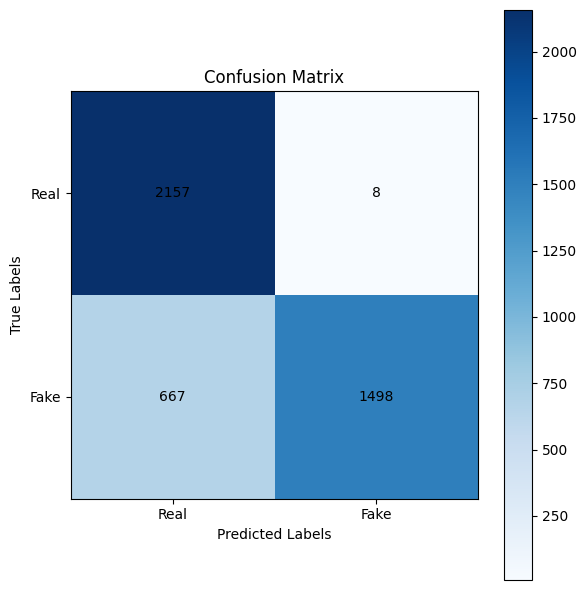

Confusion matrix saved to /kaggle/working/cnn_confusion_matrix.png


In [46]:
# Plot confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
confusion_matrix_filename = '/kaggle/working/cnn_confusion_matrix.png'
plt.savefig(confusion_matrix_filename)
plt.show()
print(f"Confusion matrix saved to {confusion_matrix_filename}")

In [47]:
import zipfile

# Save the model to a file
model.save("my_cnn_model.keras")

# Define the filenames
model_filename = "my_cnn_model.keras"
zip_filename = "my_cnn_model.zip"

# Create a zip file containing the model file
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    zipf.write(model_filename)

print(f"Model saved as {zip_filename}")

Model saved as my_cnn_model.zip


In [54]:
#Compressing the model file and converting it into .tflite
model = tf.keras.models.load_model(str('/kaggle/working/my_cnn_model.keras'))
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
with open('mask_classifier_quantized.tflite', 'wb') as f:
     f.write(tflite_model)

Saved artifact at '/tmp/tmpg9uz27bk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133081749306384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133081749006544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133081749000560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133081750593680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133081750593856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133081750596320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133081750600720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133081748885520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133081748889216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133081748893264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133081750824288

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np


# Define the image file path you want to classify
image_path = "/kaggle/input/real-and-fake-ai-generated-art-images-dataset/Data/FAKE/img000006.jpg"
# Load and preprocess the image
img = load_img(image_path, target_size=(256, 256))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Rescale to match the training data preprocessing

# Make a prediction
prediction = model.predict(img)

# The 'prediction' variable contains the predicted probability
# If the value is close to 0, it's likely class 0, and if it's close to 1, it's likely class 1.
# You can set a threshold to classify it as 0 or 1.
threshold = 0.5
if prediction[0][0] >= threshold:
    result = "Real Image"
else:
    result = "AI Image"

print("Predicted Class:", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: AI Image


In [27]:
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model("/kaggle/working/my_cnn_model.keras")

# Define the image file path you want to classify
image_path = "/kaggle/input/real-and-fake-ai-generated-art-images-dataset/Data/REAL/00060d29813e54eec710cd6f9948a40ac.jpg"

# Load and preprocess the image (similar to your previous code)
img = load_img(image_path, target_size=(256, 256))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Rescale to match the training data preprocessing

# Make a prediction using the loaded model
prediction = loaded_model.predict(img)

# The 'prediction' variable contains the predicted probability
# If the value is close to 0, it's likely class 0, and if it's close to 1, it's likely class 1.
# You can set a threshold to classify it as 0 or 1.
threshold = 0.5
if prediction[0][0] >= threshold:
    result = "Real Image"
else:
    result = "AI Image"

print("Predicted Class:", result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Predicted Class: Real Image


<a id="section-three"></a>
# <div style="color:#1968b3;display:fill;border-radius:10px;background-color:white"><p style="padding:12px;color:#1968b3"><b>3 | Pre-trained Model Implementation</b></div>

In [34]:
import os
import shutil
import random
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

<a id="subsection-one"></a>
## <b><span style='color:#1968b3'>3.1</span> | Getting data ready for model</b>

In [74]:
# Define the dataset folders
train_real_dir = '/kaggle/working/training_set/real'
train_fake_dir = '/kaggle/working/training_set/fake'
test_real_dir = '/kaggle/working/test_set/real'
test_fake_dir = '/kaggle/working/test_set/fake'

# List all images in the training and test folders
train_real_images = [os.path.join(train_real_dir, f) for f in os.listdir(train_real_dir)]
train_fake_images = [os.path.join(train_fake_dir, f) for f in os.listdir(train_fake_dir)]
test_real_images = [os.path.join(test_real_dir, f) for f in os.listdir(test_real_dir)]
test_fake_images = [os.path.join(test_fake_dir, f) for f in os.listdir(test_fake_dir)]

# Combine image paths and create labels
aiart_images = train_fake_images + test_fake_images
realart_images = train_real_images + test_real_images

image_paths = aiart_images + realart_images
labels = ['Fake'] * len(aiart_images) + ['Real'] * len(realart_images)

image_paths = [str(path) for path in image_paths]

data = pd.DataFrame({"filename": image_paths, "class": labels})

min_size = min(data['class'].value_counts())

balanced_data = data.groupby('class').apply(lambda x: x.sample(min_size)).reset_index(drop=True)

train_val_data, test_data = train_test_split(balanced_data, test_size=0.10, random_state=42, shuffle=True)

train_data, val_data = train_test_split(train_val_data, test_size=0.11, random_state=42, shuffle=True)  # 10% of 90% ≈ 10%

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='reflect'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    class_mode='binary',
    batch_size=200
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    class_mode='binary',
    batch_size=200
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col="filename",
    y_col="class",
    target_size=(224, 224),
    class_mode='binary',
    batch_size=200
)

# Print dataset sizes for confirmation
print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")

Found 17334 validated image filenames belonging to 2 classes.
Found 2143 validated image filenames belonging to 2 classes.
Found 2165 validated image filenames belonging to 2 classes.
Training set size: 17334
Validation set size: 2143
Test set size: 2165


<ipython-input-74-384ec00d1e69>:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_data = data.groupby('class').apply(lambda x: x.sample(min_size)).reset_index(drop=True)


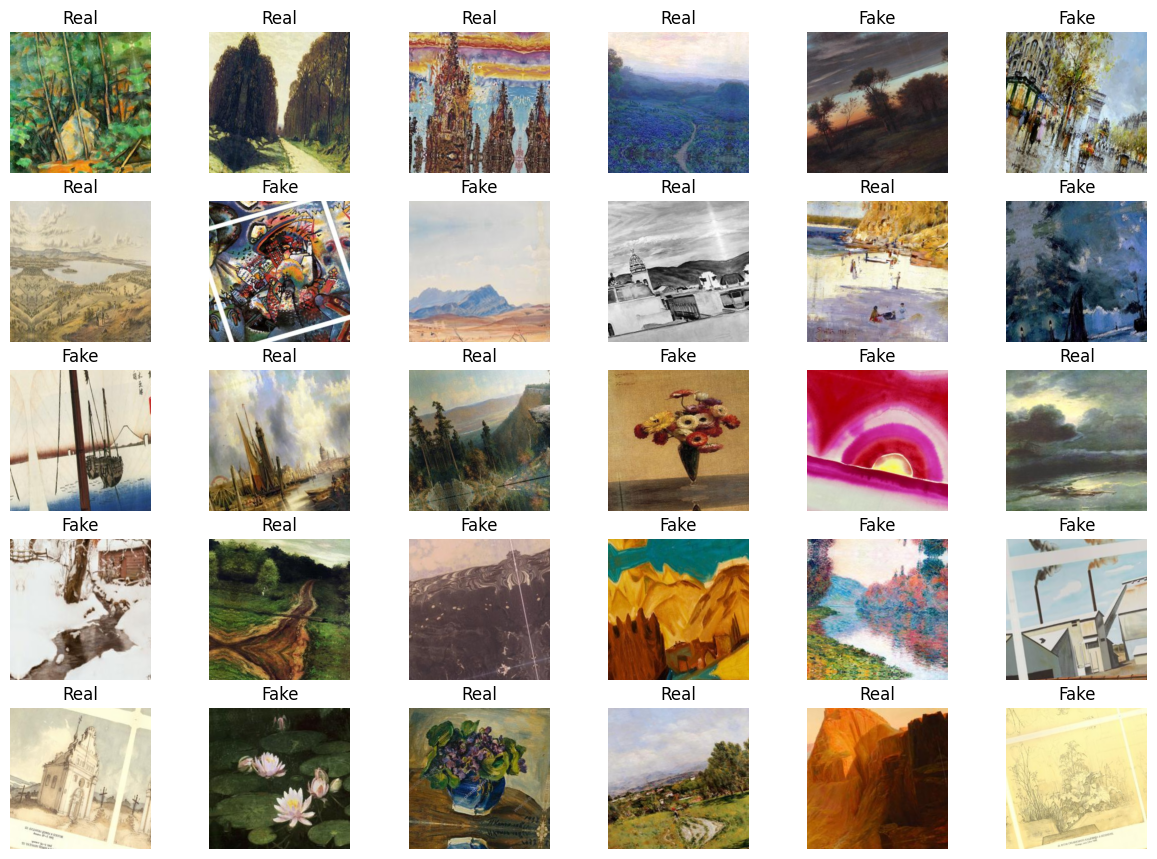

In [11]:
images, labels = next(train_generator)
class_names = list(train_generator.class_indices.keys())

plt.figure(figsize=(15, 15))

for i in range(30):
    ax = plt.subplot(7, 6, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[int(labels[i])])
    plt.axis("off")

plt.show()

<a id="section-three"></a>
# <div style="color:#1968b3;display:fill;border-radius:10px;background-color:white"><p style="padding:12px;color:#1968b3"><b>A | Fine-tuned MobileNetV1</b></div>

In [51]:
base_model_v1 = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model_v1.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [52]:
x = base_model_v1.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model_v1.input, outputs=predictions)

base_model_v1.trainable = True
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint('MobileNetV1_finetuned_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-10)

history_v1 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=20,
    callbacks=[checkpoint, reduce_lr]
)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7310 - loss: 0.5543
Epoch 1: val_loss improved from inf to 0.26324, saving model to MobileNetV1_finetuned_model.keras
136/136 ━━━━━━━━━━━━━━━━━━━━ 811s 6s/step - accuracy: 0.7316 - loss: 0.5533 - val_accuracy: 0.8906 - val_loss: 0.2632 - learning_rate: 1.0000e-05
Epoch 2/20
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1:28 656ms/step - accuracy: 0.8950 - loss: 0.2772

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 0.26324 to 0.26068, saving model to MobileNetV1_finetuned_model.keras
136/136 ━━━━━━━━━━━━━━━━━━━━ 21s 153ms/step - accuracy: 0.8950 - loss: 0.2772 - val_accuracy: 0.9059 - val_loss: 0.2607 - learning_rate: 1.0000e-05
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8998 - loss: 0.2537
Epoch 3: val_loss improved from 0.26068 to 0.20884, saving model to MobileNetV1_finetuned_model.keras
136/136 ━━━━━━━━━━━━━━━━━━━━ 787s 6s/step - accuracy: 0.8999 - loss: 0.2536 - val_accuracy: 0.9137 - val_loss: 0.2088 - learning_rate: 1.0000e-05
Epoch 4/20
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1:27 651ms/step - accuracy: 0.9000 - loss: 0.2075
Epoch 4: val_loss improved from 0.20884 to 0.15222, saving model to MobileNetV1_finetuned_model.keras
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9000 - loss: 0.2075 - val_accuracy: 0.9588 - val_loss: 0.1522 - learning_rate: 1.0000e-05
Epoch 5/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9261 - loss: 

<a id="subsection-one"></a>
## <b><span style='color:#1968b3'>A.1</span> | Evaluating the Model</b>

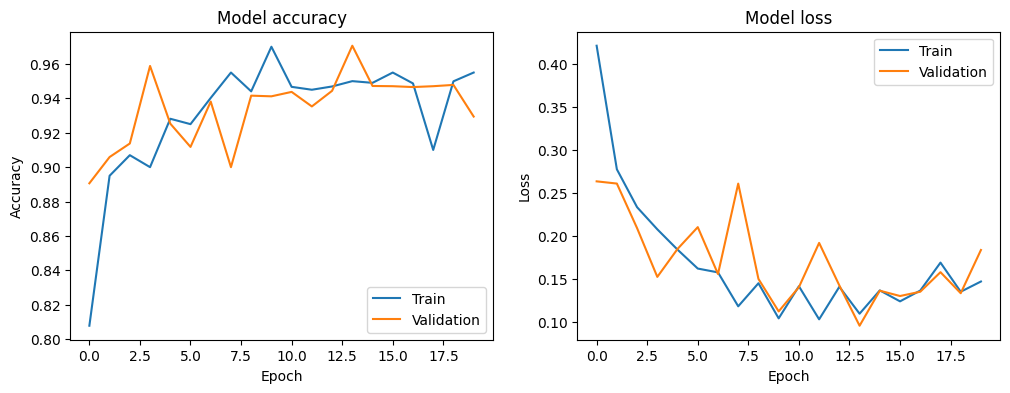

In [53]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_v1.history['accuracy'])
plt.plot(history_v1.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history_v1.history['loss'])
plt.plot(history_v1.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()

In [54]:
model = load_model('/kaggle/working/MobileNetV1_finetuned_model.keras')

test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.9511 - loss: 0.1221
Test Loss: 0.12597094476222992
Test Accuracy: 95.15%


In [55]:
def plot_training(hist):
    """
    visualize the training and validation performance of a machine learning model over epochs. 
    It plots two subplots
    1.training and validation loss 
    2. training and validation accuracy, 
    highlighting the epochs with the lowest validation loss and the highest validation accuracy
    """
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout
    plt.show()

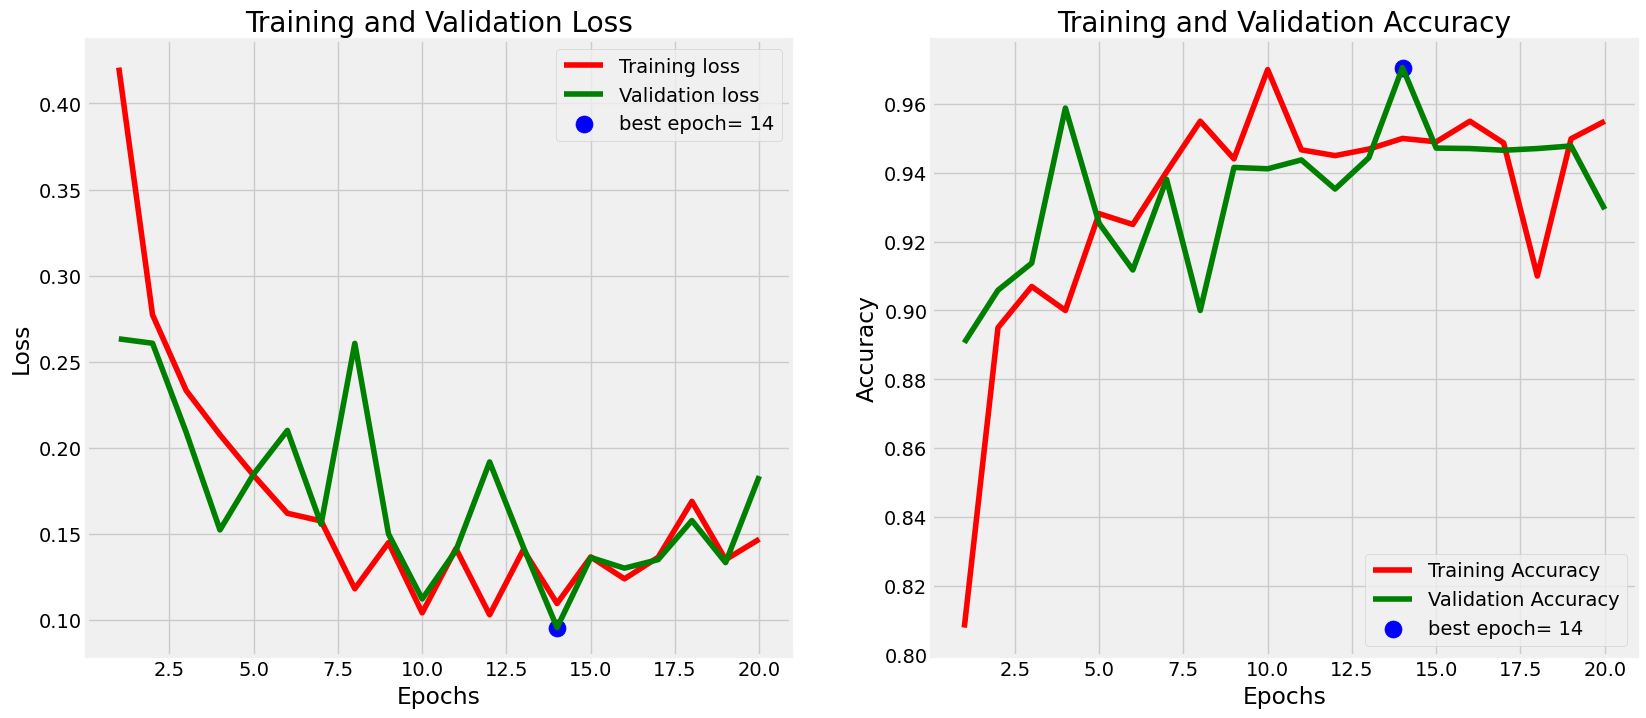

In [56]:
plot_training(history_v1)

<a id="section-three"></a>
# <div style="color:#1968b3;display:fill;border-radius:10px;background-color:white"><p style="padding:12px;color:#1968b3"><b>B | Fine-tuned MobileNetV2</b></div>

In [68]:
base_model_v2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model_v2.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [69]:
x = base_model_v2.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model_v2.input, outputs=predictions)

base_model_v2.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint = ModelCheckpoint('MobileNetV2_finetuned_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-10)

history_v2 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=20,
    callbacks=[checkpoint, reduce_lr]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6793 - loss: 0.6469
Epoch 1: val_loss improved from inf to 0.40810, saving model to MobileNetV2_finetuned_model.keras
136/136 ━━━━━━━━━━━━━━━━━━━━ 893s 6s/step - accuracy: 0.6800 - loss: 0.6457 - val_accuracy: 0.8213 - val_loss: 0.4081 - learning_rate: 1.0000e-05
Epoch 2/20
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1:39 736ms/step - accuracy: 0.8700 - loss: 0.3005

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 0.40810 to 0.39754, saving model to MobileNetV2_finetuned_model.keras
136/136 ━━━━━━━━━━━━━━━━━━━━ 14s 96ms/step - accuracy: 0.8700 - loss: 0.3005 - val_accuracy: 0.8235 - val_loss: 0.3975 - learning_rate: 1.0000e-05
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8921 - loss: 0.2658
Epoch 3: val_loss improved from 0.39754 to 0.35133, saving model to MobileNetV2_finetuned_model.keras
136/136 ━━━━━━━━━━━━━━━━━━━━ 789s 6s/step - accuracy: 0.8922 - loss: 0.2656 - val_accuracy: 0.8650 - val_loss: 0.3513 - learning_rate: 1.0000e-05
Epoch 4/20
  1/136 ━━━━━━━━━━━━━━━━━━━━ 1:38 732ms/step - accuracy: 0.9350 - loss: 0.1508
Epoch 4: val_loss improved from 0.35133 to 0.29376, saving model to MobileNetV2_finetuned_model.keras
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9350 - loss: 0.1508 - val_accuracy: 0.8882 - val_loss: 0.2938 - learning_rate: 1.0000e-05
Epoch 5/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9255 - loss: 0

<a id="subsection-one"></a>
## <b><span style='color:#1968b3'>B.1</span> | Evaluating the Model</b>

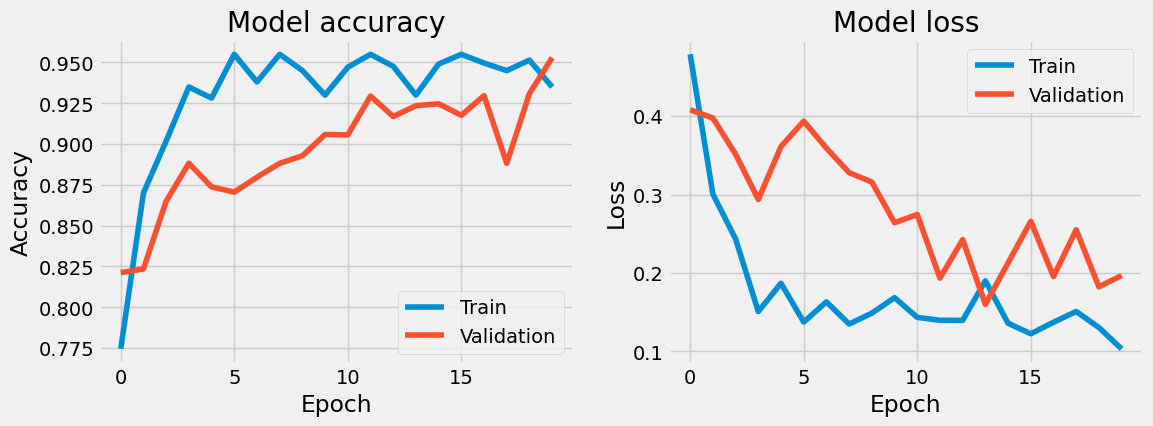

In [70]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_v2.history['accuracy'])
plt.plot(history_v2.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history_v2.history['loss'])
plt.plot(history_v2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()

In [71]:
model = load_model('/kaggle/working/MobileNetV2_finetuned_model.keras')

test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.9275 - loss: 0.2168
Test Loss: 0.21177104115486145
Test Accuracy: 92.68%


In [72]:
def plot_training(hist):
    """
    visualize the training and validation performance of a machine learning model over epochs. 
    It plots two subplots
    1.training and validation loss 
    2. training and validation accuracy, 
    highlighting the epochs with the lowest validation loss and the highest validation accuracy
    """
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout
    plt.show()

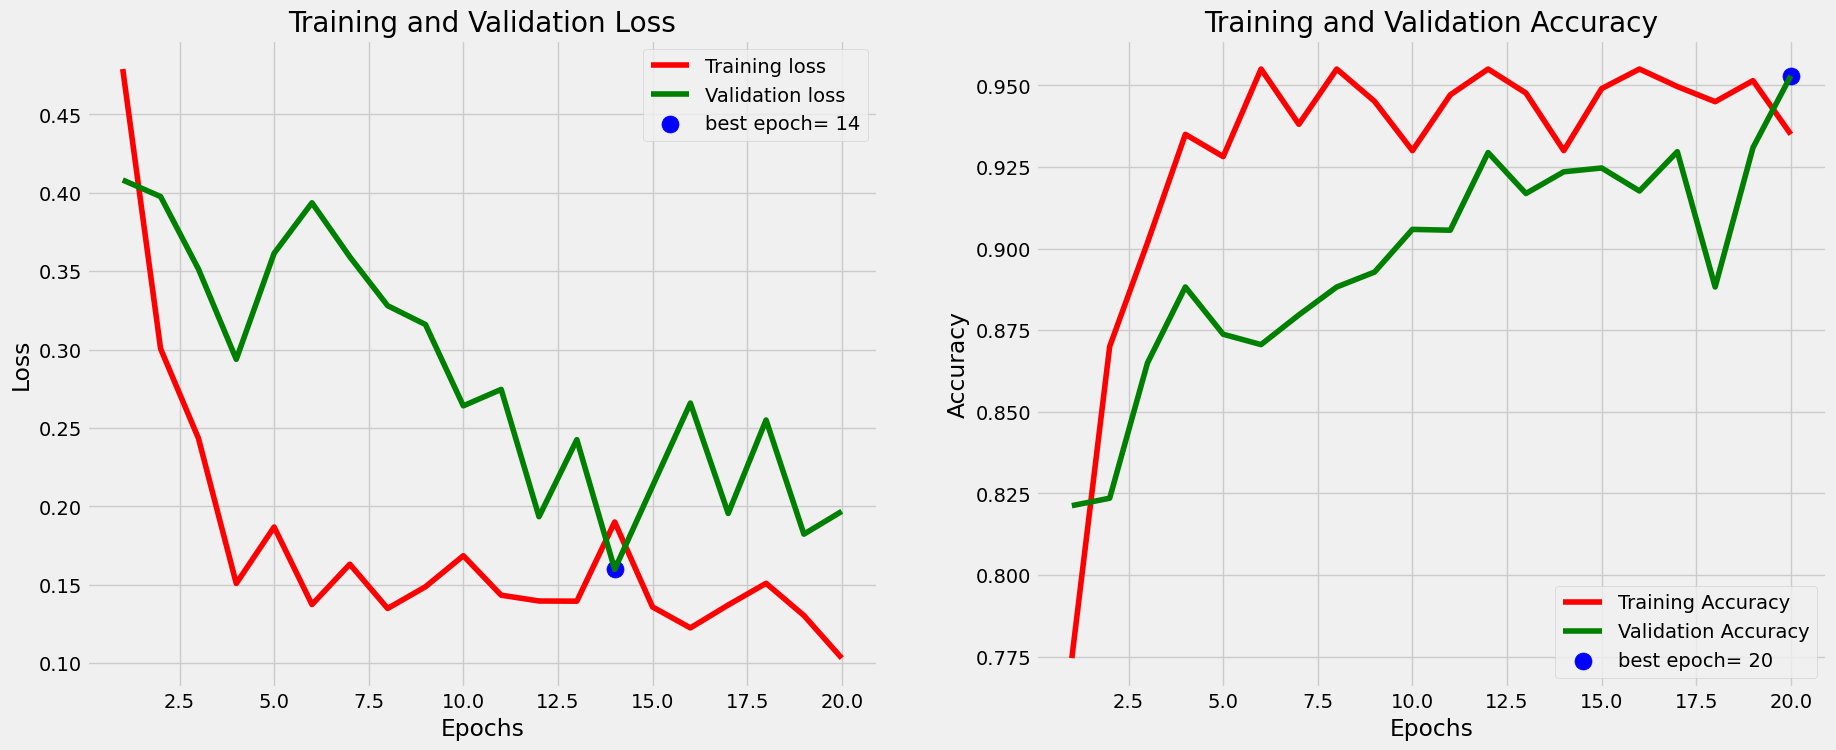

In [73]:
plot_training(history_v2)

## Conclusion

- **Custom CNN Model** achieved 85.7% test accuracy for real vs. fake art classification, trained on 10,821 real and AI-generated images each.  
- **Key Steps**: Data augmentation, custom CNN architecture (4 Conv layers), transfer learning experimentation, and evaluation via confusion matrix.  
- **Deployment**: Model saved as `.keras`  
- **Pre-trained Model** implementation (MobileNetV1 and MobileNetV2) with Model Accuracy of **95.15%** and **92.16%** respectively.
- **Future Work**: Expand dataset diversity, optimize pre-trained models, and enhance real-world applicability.  